# Preprocessing for sales recommendations

## Loading the data

In [1]:
from mba.data import (
    get_ffp_train_df,
    get_ffp_rollout_df,
    get_reviews_train_df_fpath,
    get_reviews_rollout_df_fpath,
)

In [2]:
raw_tdf = get_ffp_train_df()

In [3]:
raw_tdf

,ID,OTHER_SITE_VALUE,STATUS_PANTINUM,STATUS_GOLD,STATUS_SILVER,NUM_DEAL,LAST_DEAL,ADVANCE_PURCHASE,FARE_L_Y1,FARE_L_Y2,...,POINTS_L_Y1,POINTS_L_Y2,POINTS_L_Y3,POINTS_L_Y4,POINTS_L_Y5,SERVICE_FLAG,CANCEL_FLAG,CREDIT_FLAG,RECSYS_FLAG,BUYER_FLAG
0,1,13.140434,0,0,0,0,0,16,36.8,37.0,...,34.6,47.1,34.7,26.0,42.6,0,0,0,0,0
1,2,9.091326,0,0,0,3,16,18,45.2,47.2,...,50.7,42.9,41.1,50.9,30.4,0,0,0,0,0
2,3,6.742492,0,0,0,5,5,17,29.0,24.8,...,33.9,40.0,37.5,38.5,24.5,0,0,0,0,0
3,4,11.829185,0,0,0,3,14,19,47.8,47.0,...,47.6,57.4,51.5,30.0,31.6,0,0,0,0,0
4,5,7.464712,0,1,0,3,28,26,81.8,81.2,...,81.3,85.2,77.8,82.2,95.4,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,7.281724,0,0,0,5,8,22,40.0,37.5,...,20.6,26.3,31.0,24.8,31.9,0,0,0,0,0
39996,39997,3.450719,0,0,0,11,0,14,28.0,36.5,...,42.7,37.0,28.4,27.4,36.8,0,1,0,0,0
39997,39998,7.282398,0,0,0,6,8,12,46.5,44.8,...,38.5,40.2,48.9,48.3,59.8,0,0,0,0,0
39998,39999,7.934329,0,0,1,1,55,30,52.5,56.0,...,71.2,70.8,82.8,60.3,68.7,0,0,0,0,0


In [4]:
raw_tdf.columns

Index(['ID', 'OTHER_SITE_VALUE', 'STATUS_PANTINUM', 'STATUS_GOLD',
       'STATUS_SILVER', 'NUM_DEAL', 'LAST_DEAL', 'ADVANCE_PURCHASE',
       'FARE_L_Y1', 'FARE_L_Y2', 'FARE_L_Y3', 'FARE_L_Y4', 'FARE_L_Y5',
       'POINTS_L_Y1', 'POINTS_L_Y2', 'POINTS_L_Y3', 'POINTS_L_Y4',
       'POINTS_L_Y5', 'SERVICE_FLAG', 'CANCEL_FLAG', 'CREDIT_FLAG',
       'RECSYS_FLAG', 'BUYER_FLAG'],
      dtype='object')

In [5]:
raw_tdf.columns[0]

'ID'

## Building the pipeline

In [6]:
from mba.shared import (
    Column,
    ContextKey,
)

In [7]:
from mba.pipeline import build_pipeline

In [8]:
pline = build_pipeline()

Starting to build the preprocessing pipeline...
Building the sentiment predictor...
Transformation Pipeline and Model Successfully Loaded
Done.
Building pipeline stages...
Done. Returning pipeline.


In [9]:
pline

A pdpipe pipeline:
[ 0]  Apply dataframe method set_index with kwargs {'keys': 'ID'}
[ 1]  Add the sentiment columns to input dataframes

In [10]:
tdf = pline.fit_transform(
    X=raw_tdf,
    verbose=True,
    context={
        ContextKey.REVIEWS_FPATH: get_reviews_train_df_fpath(),
    },
)

- set_index: Apply dataframe method set_index with kwargs {'keys': 'ID'}
- Add the sentiment columns to input dataframes
  - 1994 id intersection between input & reviewes.
  - None-NA sentiment features adde to 1994 rows.


In [11]:
tdf

,OTHER_SITE_VALUE,STATUS_PANTINUM,STATUS_GOLD,STATUS_SILVER,NUM_DEAL,LAST_DEAL,ADVANCE_PURCHASE,FARE_L_Y1,FARE_L_Y2,FARE_L_Y3,FARE_L_Y4,FARE_L_Y5,POINTS_L_Y1,POINTS_L_Y2,POINTS_L_Y3,POINTS_L_Y4,POINTS_L_Y5,SERVICE_FLAG,CANCEL_FLAG,CREDIT_FLAG,RECSYS_FLAG,BUYER_FLAG,sentiment_0,sentiment_1
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,13.140434,0,0,0,0,0,16,36.8,37.0,37.8,35.0,34.8,34.6,47.1,34.7,26.0,42.6,0,0,0,0,0,0.0,0.0
2,9.091326,0,0,0,3,16,18,45.2,47.2,45.5,44.2,42.8,50.7,42.9,41.1,50.9,30.4,0,0,0,0,0,0.0,0.0
3,6.742492,0,0,0,5,5,17,29.0,24.8,30.8,31.5,29.8,33.9,40.0,37.5,38.5,24.5,0,0,0,0,0,0.0,0.0
4,11.829185,0,0,0,3,14,19,47.8,47.0,45.2,41.0,35.8,47.6,57.4,51.5,30.0,31.6,0,0,0,0,0,0.0,0.0
5,7.464712,0,1,0,3,28,26,81.8,81.2,80.5,82.2,83.5,81.3,85.2,77.8,82.2,95.4,0,1,0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39996,7.281724,0,0,0,5,8,22,40.0,37.5,29.5,27.2,31.2,20.6,26.3,31.0,24.8,31.9,0,0,0,0,0,0.0,0.0
39997,3.450719,0,0,0,11,0,14,28.0,36.5,32.0,31.2,32.2,42.7,37.0,28.4,27.4,36.8,0,1,0,0,0,0.0,0.0
39998,7.282398,0,0,0,6,8,12,46.5,44.8,45.8,45.2,44.5,38.5,40.2,48.9,48.3,59.8,0,0,0,0,0,0.0,0.0


<AxesSubplot:>

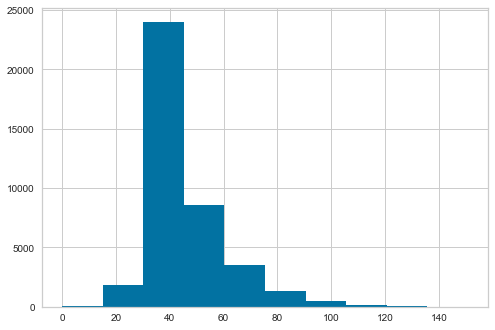

In [20]:
tdf.FARE_L_Y1.hist()